<a href="https://colab.research.google.com/github/jcdumlao14/ESS11DataAnalysis/blob/main/EFA_and_Statistical_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Factor Analysis (EFA) and Statistical Measures**


# **I. EFA and Statistical Measures - Variables:**


## **A. Trust and Social Attitudes**:
 - **ppltrst** (Most people can be trusted or you can't be too careful): This is a classic measure of generalized trust. It's measured on a scale from 0-10.
 - **pplfair** (Most people try to take advantage of you, or try to be fair): Measures perceptions of fairness. Scale of 0-10.
 - **pplhlp** (Most of the time people helpful or mostly looking out for themselves): Measures perceptions of helpfulness. Scale of 0-10.
 - **polintr** (How interested in politics): Ordinal variable with categories like "Very interested," "Quite interested," etc.
 - **trstprl** (Trust in country's parliament): Scale of 0-10.
 - **trstigl** (Trust in the legal system): Scale of 0-10.
 - **trstplc** (Trust in the police): Scale of 0-10.
 - **trstplt** (Trust in politicians): Scale of 0-10.
 - **trstprt** (Trust in political parties): Scale of 0-10.
 - **trstun** (Trust in the United Nations): Scale of 0-10.
 - **trstep** (Trust in the European Parliament): Scale of 0-10.




## **B. Political Engagement & Efficacy**:
- **psppsgva** (Political system allows people to have a say in what government does): Ordinal scale.
- **psppipla** (Political system allows people to have influence on politics): Ordinal scale.
- **cptppola** (Confident in own ability to participate in politics): Ordinal scale.
- **actrolga** (Able to take active role in political group): Ordinal scale.
vote (Voted last national election): Dichotomous (Yes/No).


## **C. Socio-Economic Satisfaction/Attitudes**:
- **stflife** (How satisfied with life as a whole): Scale of 0-10.
- **stfeco** (How satisfied with present state of economy in country): Scale of 0-10.
- **stfgov** (How satisfied with the national government): Scale of 0-10.
- **stfdem** (How satisfied with the way democracy works in country): Scale of 0-10.

- **stfedu** (State of education in country nowadays): Scale of 0-10.

- **stfhlth** (State of health services in country nowadays): Scale of 0-10.


## **D. Immigration Attitudes**:
 - **imsmetn** (Allow many/few immigrants of same race/ethnic group as majority): Ordinal scale.
 - **imdfetn** (Allow many/few immigrants of different race/ethnic group from majority): Ordinal scale.
 - **impcntr** (Allow many/few immigrants from poorer countries outside Europe): Ordinal scale.
   - **Simbgeco** (Immigration bad or good for country's economy): Scale of 0-10.
 - **imueclt** (Country's cultural life undermined or enriched by immigrants): Scale of 0-10.
 - **imwbcnt** (Immigrants make country worse or better place to live): Scale of 0-10.


## **E. Climate Change Attitudes**:
  - **ccnthum** (Climate change caused by natural processes, human activity, or both): Ordinal scale
  - **ccrdprs** (To what extent feel personal responsibility to reduce climate change): Ordinal scale
  - **wrclmch** (How worried about climate change): Ordinal scale


# **II. Variables Requiring Caution or Transformation**
- **nwspol** (News about politics and current affairs, watching, reading or listening, in minutes): This is a continuous variable, but it might have a skewed distribution. Consider transformations (e.g., logarithmic) if needed for normality assumptions in some analyses.
- **netusoft** (Internet use, how often): Ordinal scale.


# **III. Variables Not Recommended for EFA or Basic Statistical Analysis**
- **Name, edition, proddate, idno, cntry, prtvxxx** (Party voted for) : These are generally ID, geographic identifiers, or nominal categorical variables that don't meaningfully contribute to factor analysis.
- **dweight, pspwght, pweight, anweight**: These are weights that should be used in the analysis, not as the items themselves.


# **IV. Considerations for EFA**:
- **Theoretical Rationale**: You should have a theoretical reason to expect that certain variables will load together on factors (e.g., certain trust questions might tap into a broader "social trust" factor).
- **Sample Size**: EFA requires a sufficient sample size. A general rule of thumb is to have at least 10-20 observations per variable (and ideally, much more).
- **Data Level**: All variables should be numerical and not of nominal level.


# **V. Steps to Take**:
1. **Variable Selection**: Choose variables from the list above that are theoretically relevant to your research questions and suitable for factor analysis.
2. **Data Cleaning and Preparation**:
   - Deal with missing data (imputation or listwise deletion). Consider the implications of your chosen method.
   - Examine distributions of variables (histograms, boxplots) to identify potential issues with non-normality, outliers, etc.
   - Consider transformations (e.g., logarithmic for skewed variables) as appropriate.
3. **EFA Execution**: Run your EFA in a statistical software package (Python).
4. **Interpretation**: Carefully interpret the factors you obtain, considering the variables that load on each factor and the theoretical meaning of those groupings.
5. **Calculation of Statistical Measures**: Calculate Variance, Mean, Median, Standard Deviation, 95% CI Limits, Skewness, and Kurtosis for each variable and/or for the factor scores that you obtain from the EFA.


## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import sys
import subprocess

In [ ]:
# Attempt to import factor_analyzer, if it fails, install and then import
try:
    from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
    print("factor_analyzer is already installed.")
except ModuleNotFoundError:
    print("factor_analyzer is not installed. Installing...")
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'factor_analyzer'])
        from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
        print("factor_analyzer has been successfully installed and imported.")
    except Exception as e:
        print(f"Failed to install factor_analyzer: {e}")
        print("Please install it manually using: pip install factor_analyzer")
        exit()



factor_analyzer is already installed.


# **Load the Dataset**

In [ ]:
# Load dataset
try:
    df = pd.read_csv('/content/ESS11.csv')
except FileNotFoundError:
    raise FileNotFoundError("Dataset file not found. Check '/content/ESS11.csv' path.")


/tmp/ipython-input-266463011.py:3: DtypeWarning: Columns (192,198,666) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ESS11.csv')


# **Data Cleaning & Required Cols**

In [ ]:
# Data cleaning & required cols
key_cols = ['weighta', 'height', 'etfruit', 'eatveg', 'dosprt','mainact','slprl','alcwkdy','alcwknd',"hltprhc", "hltprhb", "hltphhc", "hltphhb",
            'cgtsmok', 'alcfreq', 'edulvlb', 'hinctnta', 'gndr', 'ppltrst', 'pplfair', 'pplhlp', 'agea']

# Check that required columns exist
missing_cols = [c for c in key_cols if c not in df.columns]
if missing_cols:

    raise KeyError(f"The following required columns for initial cleaning are missing from the dataframe: {missing_cols}")

df = df.dropna(subset=key_cols).copy()
print(f"Step 1: Dropped rows with NA in key columns. Remaining rows: {len(df)}")


Step 1: Dropped rows with NA in key columns. Remaining rows: 46162


In [ ]:
# Convert columns to numeric, handling errors
cols_to_convert = ["hltprhc", "hltprhb", "hltphhc", "hltphhb"]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to numeric and coerce errors to NaN

# Impute missing values
df[cols_to_convert] = df[cols_to_convert].fillna(0)

# Add the new CVD column
df["CVD"] = df[["hltprhc", "hltprhb", "hltphhc", "hltphhb"]].sum(axis=1)
print("Step 2: hltprhc, hltprhb, hltphhc, hltphhb to CVD")

Step 2: hltprhc, hltprhb, hltphhc, hltphhb to CVD


In [ ]:
# Convert height from cm to meters and compute BMI
df['height_m'] = df['height'] / 100.0
df['BMI'] = df['weighta'] / (df['height_m'] ** 2)
df = df[np.isfinite(df['BMI'])].copy()
print("Step 3: Calculated BMI and removed infinite values.")

Step 3: Calculated BMI and removed infinite values.


In [ ]:
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,jinwe,inwtm,mode,domain,prob,stratum,psu,CVD,height_m,BMI
0,ESS11e03,11,3.0,02.06.2025,50014,AT,1.185115,0.392891,0.330915,0.130013,...,2023-11-12 15:26:55,30.0,1,2.0,0.000579,107,317,1,1.78,28.405504
1,ESS11e03,11,3.0,02.06.2025,50030,AT,0.609898,0.325153,0.330915,0.107598,...,2023-10-18 10:44:18,40.0,1,1.0,0.001124,69,128,1,1.68,26.218821
2,ESS11e03,11,3.0,02.06.2025,50057,AT,1.392330,4.000023,0.330915,1.323666,...,2023-09-30 14:13:33,42.0,1,2.0,0.000493,18,418,0,1.80,29.320988
3,ESS11e03,11,3.0,02.06.2025,50106,AT,0.556061,0.176228,0.330915,0.058316,...,2023-06-30 15:11:21,34.0,1,1.0,0.001233,101,295,1,1.67,25.099502
4,ESS11e03,11,3.0,02.06.2025,50145,AT,0.722795,1.060940,0.330915,0.351080,...,2023-07-11 11:14:03,57.0,1,2.0,0.000949,115,344,0,1.68,23.738662


In [ ]:
# Ensure CVD is binary/int (map or cast if necessary)
if df['CVD'].dtype == object:
    try:  # simple mapping
        df['CVD'] = df['CVD'].map(lambda x: 1 if str(x).lower() in ['1', 'yes', 'true', 'y', 't'] else 0)
        df['CVD'] = df['CVD'].astype(int)
        print(f"Unique values in Y (CVD): {np.unique(df['CVD'])}")
    except:
        print("CVD conversion failed. Check the values in the CVD column.")

In [ ]:
# European regions mapping
region_map = {
    'NO': 'North', 'SE': 'North', 'DK': 'North', 'FI': 'North', 'IS': 'North', 'GB': 'North', 'IE': 'North',
    'FR': 'West', 'BE': 'West', 'NL': 'West', 'LU': 'West', 'DE': 'West', 'AT': 'West',
    'ES': 'South', 'PT': 'South', 'IT': 'South', 'GR': 'South', 'CY': 'South', 'MT': 'South',
    'PL': 'East', 'CZ': 'East', 'SK': 'East', 'HU': 'East', 'RO': 'East', 'BG': 'East', 'SI': 'East',
    'HR': 'East'
}

def get_region(code):
    if pd.isna(code):
        return 'Unknown'
    c = str(code).upper()
    return region_map.get(c, 'Unknown')

df['region'] = df['cntry'].apply(get_region)
print("Step 4: European region mapping.")


Step 4: European region mapping.


In [ ]:
# Variable Selection and Statistical Measures

# Define desired variable groups
trust_cols = ['ppltrst', 'pplfair', 'pplhlp', 'trstprl', 'trstigl', 'trstplc', 'trstplt', 'trstprt', 'trstun',
              'trstep']
political_cols = ['polintr', 'psppsgva', 'psppipla', 'cptppola', 'actrolga', 'vote']
socioeco_cols = ['stflife', 'stfeco', 'stfgov', 'stfdem', 'stfedu', 'stfhlth']
immigration_cols = ['imsmetn', 'imdfetn', 'impcntr', 'imbgeco', 'imueclt', 'imwbcnt']
climate_cols = ['ccnthum', 'ccrdprs', 'wrclmch']

all_desired_cols = trust_cols + political_cols + socioeco_cols + immigration_cols + climate_cols


#  **Check which columns actually exist in the dataset**


In [ ]:
available_cols = [col for col in all_desired_cols if col in df.columns]
missing_efa_cols = [col for col in all_desired_cols if col not in df.columns]

if missing_efa_cols:
    print("\n" + "="*50)
    print("WARNING: MISSING VARIABLES")
    print(f"The following variables requested for analysis were NOT found in the dataset:")
    print(missing_efa_cols)
    print("Proceeding with the variables that ARE available.")
    print("="*50 + "\n")

if not available_cols:
    raise ValueError("CRITICAL ERROR: None of the requested variables for EFA/Stats were found in the dataset. Cannot proceed.")

# Group lists to only include available columns.

trust_cols = [col for col in trust_cols if col in df.columns]
political_cols = [col for col in political_cols if col in df.columns]
socioeco_cols = [col for col in socioeco_cols if col in df.columns]
immigration_cols = [col for col in immigration_cols if col in df.columns]
climate_cols = [col for col in climate_cols if col in df.columns]

# Filter the DataFrame to include only AVAILABLE columns, dealing with missing data
# We use available_cols instead of all_desired_cols
df_selected = df[available_cols].dropna().copy()
print(f"Step 5: Selected available variables and dropped NA. Remaining rows: {len(df_selected)}")



The following variables requested for analysis were NOT found in the dataset:
['trstigl']
Proceeding with the variables that ARE available.

Step 5: Selected available variables and dropped NA. Remaining rows: 46162


# **Function to Calculate and Statistical Measures**

In [ ]:
# Function to calculate and statistical measures, including 95% CI
def calculate_stats(df, col):
    """Calculates and prints descriptive statistics for a given column."""
    data = df[col]
    # Ensure data is numeric before calculating stats
    if not pd.api.types.is_numeric_dtype(data):
         # Try to convert, or skip if it fails
         try:
             data = pd.to_numeric(data)
         except:
             print(f"--- Skipping stats for column: {col} (Cannot convert to numeric) ---")
             return

    variance = data.var()
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    skewness = data.skew()
    kurtosis = data.kurtosis()

    # Calculate 95% Confidence Interval
    n = len(data)
    if n > 1:
        sem = std_dev / sqrt(n)  # Standard Error of the Mean
        confidence_interval = stats.t.interval(0.95, n - 1, loc=mean, scale=sem)
    else:
        confidence_interval = (np.nan, np.nan)

    print(f"--- Statistics for column: {col} ---")
    print(f"Variance: {variance:.4f}")
    print(f"Mean: {mean:.4f}")
    print(f"Median: {median:.4f}")
    print(f"Standard Deviation: {std_dev:.4f}")
    print(f"95% Confidence Interval: {confidence_interval}")
    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")
    print("\n")

In [ ]:
# Loop through all AVAILABLE columns and calculate statistics
print("\n--- Calculating Statistical Measures ---")
for col in available_cols:
    calculate_stats(df_selected, col)


--- Calculating Statistical Measures ---
--- Statistics for column: ppltrst ---
Variance: 23.6812
Mean: 5.2439
Median: 5.0000
Standard Deviation: 4.8663
95% Confidence Interval: (np.float64(5.199551772262618), np.float64(5.288338700420541))
Skewness: 12.4226
Kurtosis: 207.9982


--- Statistics for column: pplfair ---
Variance: 42.7035
Mean: 6.0567
Median: 6.0000
Standard Deviation: 6.5348
95% Confidence Interval: (np.float64(5.997055907818906), np.float64(6.116284068785227))
Skewness: 10.8331
Kurtosis: 132.9277


--- Statistics for column: pplhlp ---
Variance: 27.1581
Mean: 5.2713
Median: 5.0000
Standard Deviation: 5.2113
95% Confidence Interval: (np.float64(5.223721194095568), np.float64(5.318802959970546))
Skewness: 12.4068
Kurtosis: 193.3210


--- Statistics for column: trstprl ---
Variance: 139.2884
Mean: 6.0734
Median: 5.0000
Standard Deviation: 11.8021
95% Confidence Interval: (np.float64(5.965728679669212), np.float64(6.181058721223296))
Skewness: 6.3709
Kurtosis: 41.0114


---

# **Exploratory Factor Analysis (EFA)**

In [ ]:
# Exploratory Factor Analysis (EFA) Helper Function

def run_efa(df_subset, col_list, group_name, n_factors_to_extract, output_suffix):
    """Runs EFA, prints results, and saves visualizations for a group of variables."""
    print(f"\n{'='*20} Analyzing: {group_name} {'='*20}")


    if len(col_list) < 2:
        print(f"WARNING: Not enough variables available for EFA in {group_name}.")
        print(f"Available variables: {col_list}. Need at least 2.")
        print(f"Skipping EFA for {group_name}.")
        return

    df_group = df_subset[col_list].copy()

    # Check Bartlett's test of sphericity and KMO statistic
    try:
        chi_square_value, p_value = calculate_bartlett_sphericity(df_group)
        kmo_all, kmo_model = calculate_kmo(df_group)

        print(f"\n--- EFA Pre-Checks for {group_name} Variables ---")
        print(f"Bartlett's Test of Sphericity: Chi-square value = {chi_square_value:.4f}, p-value = {p_value:.4e}")
        print(f"Kaiser-Meyer-Olkin (KMO) Statistic: {kmo_model:.4f}")
        print("Higher KMO values (close to 1) indicate suitability for factor analysis.")
    except Exception as e:
         print(f"Pre-checks failed (Could be due to singular matrix or insufficient correlation): {e}")
         print(f"Skipping EFA for {group_name}.")
         return

    # Standardize the data before EFA
    scaler = StandardScaler()
    df_group_scaled = scaler.fit_transform(df_group)
    df_group_scaled = pd.DataFrame(df_group_scaled, columns=col_list)

    # Ensure we don't try to extract more factors than variables
    n_factors = min(n_factors_to_extract, len(col_list))

    # Perform factor analysis
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
    fa.fit(df_group_scaled)

    # Get eigenvalues and plot scree plot
    ev, v = fa.get_eigenvalues()
    plt.figure(figsize=(10, 6))
    plt.scatter(range(1, df_group_scaled.shape[1] + 1), ev)
    plt.plot(range(1, df_group_scaled.shape[1] + 1), ev)
    plt.title(f'Scree Plot for {group_name} Variables', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Factors', fontsize=14, fontweight='bold', color='#3f8a74')
    plt.ylabel('Eigenvalue', fontsize=14, fontweight='bold', color='#3f8a74')
    plt.gca().set_facecolor('#e1faf5')
    plt.grid(False)
    plt.axhline(y=1, color='r', linestyle='--') # Add line at eigenvalue = 1
    plt.savefig(f'scree_plot_{output_suffix}.png')
    plt.show()

    # Get factor loadings
    loadings = fa.loadings_
    loadings_df = pd.DataFrame(loadings, index=col_list, columns=[f'Factor {i+1}' for i in range(n_factors)])
    print(f"\n--- Factor Loadings for {group_name} Variables ---")
    print(loadings_df)

    # Visualization of factor loadings (Heatmap)
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title(f'Factor Loadings Heatmap for {group_name} Variables', fontsize=16, fontweight='bold', color='navy')
    plt.savefig(f'factor_loadings_heatmap_{output_suffix}.png')
    plt.show()

    # Visualization and Grouped Bar Chart
    if n_factors > 0:
        fig, ax = plt.subplots(figsize=(14, 8))
        num_factors = loadings.shape[1]
        bar_width = 0.8 / num_factors
        x = np.arange(len(col_list))

        for i in range(num_factors):
            ax.bar(x + (i - num_factors / 2) * bar_width + bar_width/2, loadings[:, i], width=bar_width, label=f'Factor {i+1}')

        ax.set_xlabel(f'{group_name} Variables', fontsize=14, fontweight='bold', color='#3f8a74')
        ax.set_ylabel('Factor Loadings', fontsize=14, fontweight='bold', color='#3f8a74')
        ax.set_title(f'Grouped Bar Chart of Factor Loadings for {group_name} Variables', fontsize=16, fontweight='bold', color='navy')
        ax.set_xticks(x)
        ax.set_xticklabels(col_list, rotation=45, ha='right')
        ax.legend()
        ax.grid(axis='y', linestyle='--')
        plt.gca().set_facecolor('#e1faf5')
        plt.grid(False)
        plt.tight_layout()
        plt.savefig(f'factor_loadings_grouped_bar_{output_suffix}.png')
        plt.show()

    print(f"\nEFA completed for {group_name}. Check saved PNG files for visualizations.")



==================== Analyzing: Trust and Social Attitudes ====================

--- EFA Pre-Checks for Trust and Social Attitudes Variables ---
Bartlett's Test of Sphericity: Chi-square value = 93890.7942, p-value = 0.0000e+00
Kaiser-Meyer-Olkin (KMO) Statistic: 0.7325
Higher KMO values (close to 1) indicate suitability for factor analysis.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


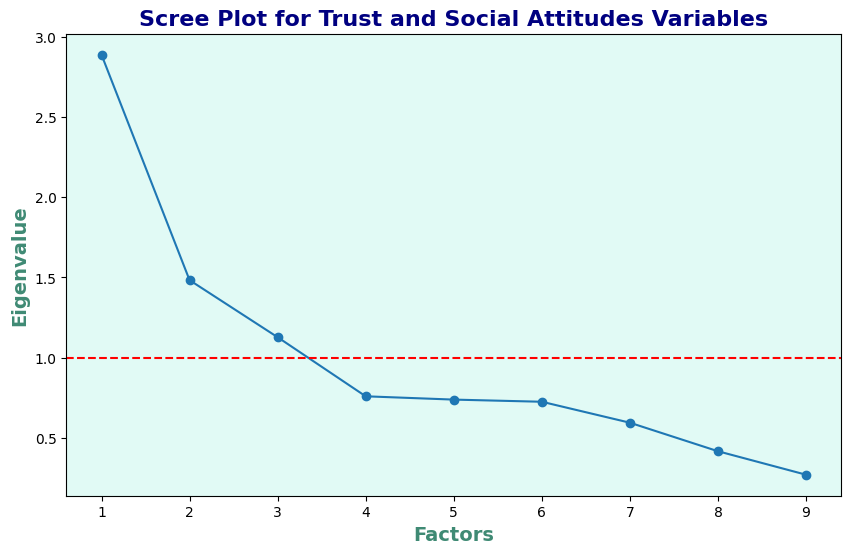


--- Factor Loadings for Trust and Social Attitudes Variables ---
         Factor 1  Factor 2  Factor 3
ppltrst  0.058787 -0.003994  0.525832
pplfair  0.048097  0.037746  0.506944
pplhlp   0.061619  0.034912  0.506333
trstprl  0.532691  0.249662  0.083589
trstplc  0.396889  0.164937  0.120585
trstplt  0.858127  0.103992  0.045013
trstprt  0.814349  0.147505  0.041098
trstun   0.198526  0.714110  0.027739
trstep   0.245956  0.741831  0.037769


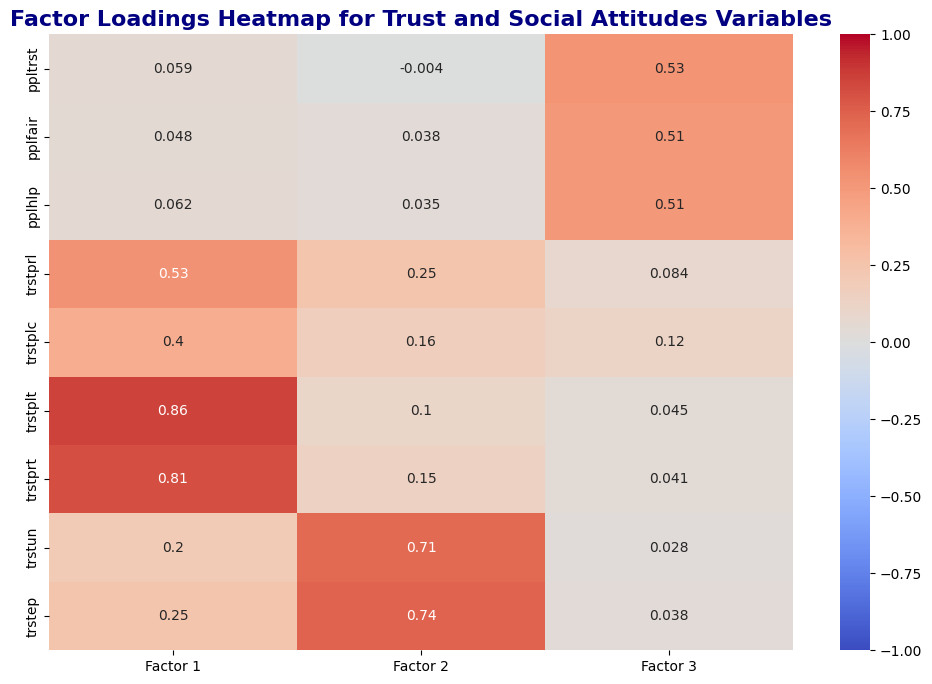

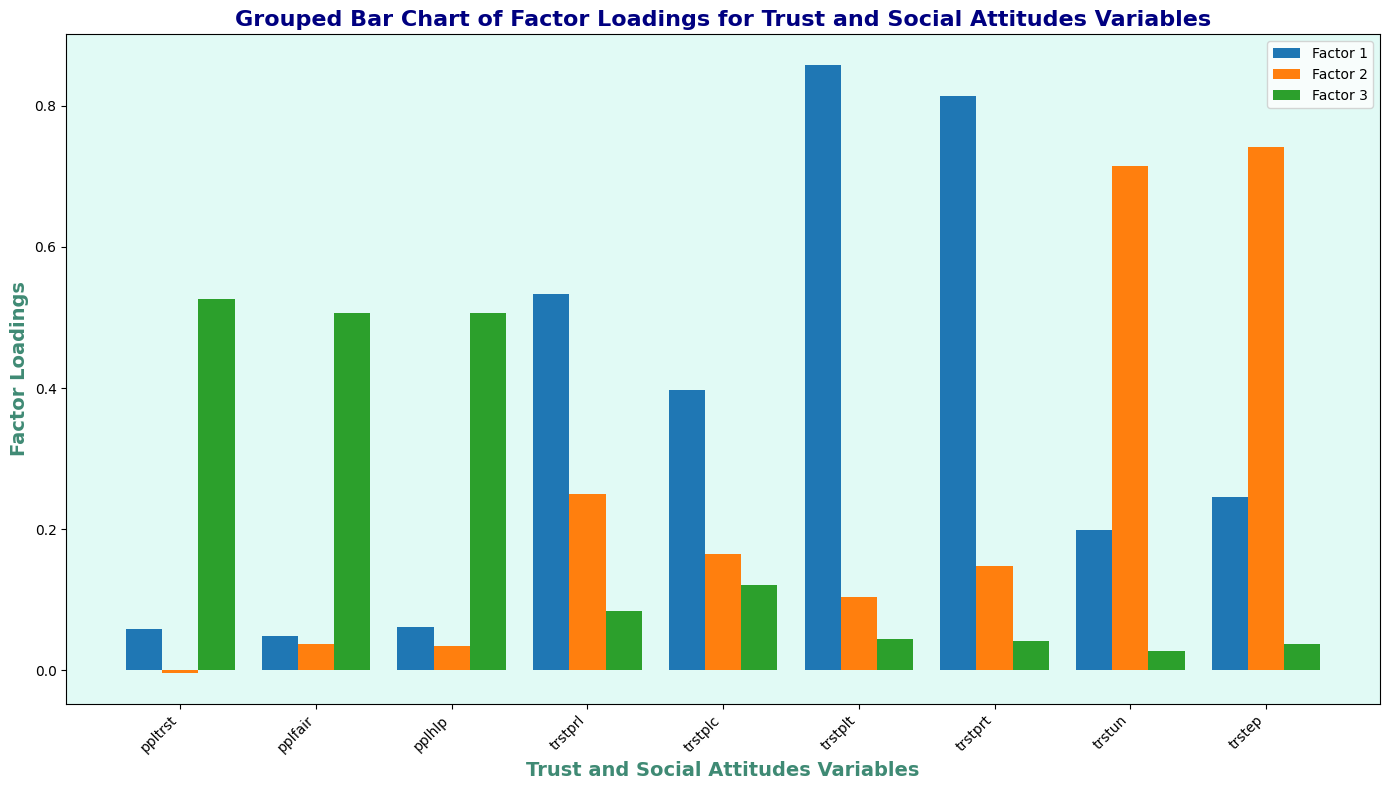


EFA completed for Trust and Social Attitudes. Check saved PNG files for visualizations.

==================== Analyzing: Political Engagement & Efficacy ====================

--- EFA Pre-Checks for Political Engagement & Efficacy Variables ---
Bartlett's Test of Sphericity: Chi-square value = 51821.2670, p-value = 0.0000e+00
Kaiser-Meyer-Olkin (KMO) Statistic: 0.6849
Higher KMO values (close to 1) indicate suitability for factor analysis.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


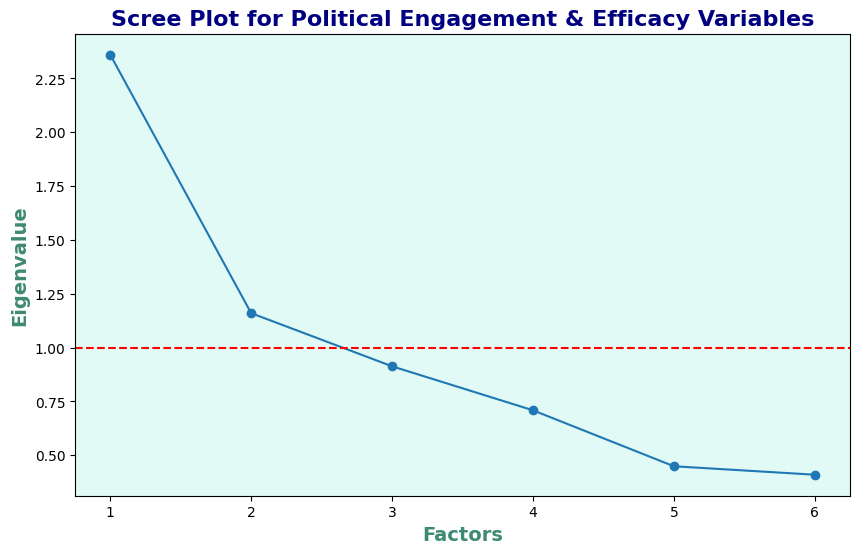


--- Factor Loadings for Political Engagement & Efficacy Variables ---
          Factor 1  Factor 2
polintr  -0.149231 -0.383100
psppsgva  0.817910  0.068587
psppipla  0.698357  0.206414
cptppola  0.281450  0.624687
actrolga  0.322360  0.697077
vote      0.048774 -0.139277


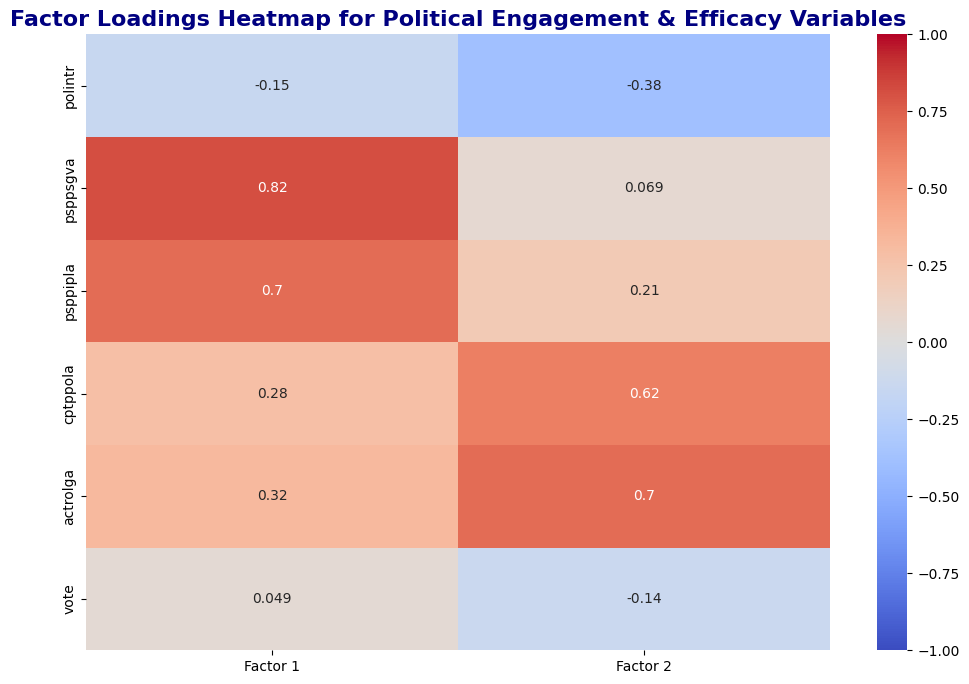

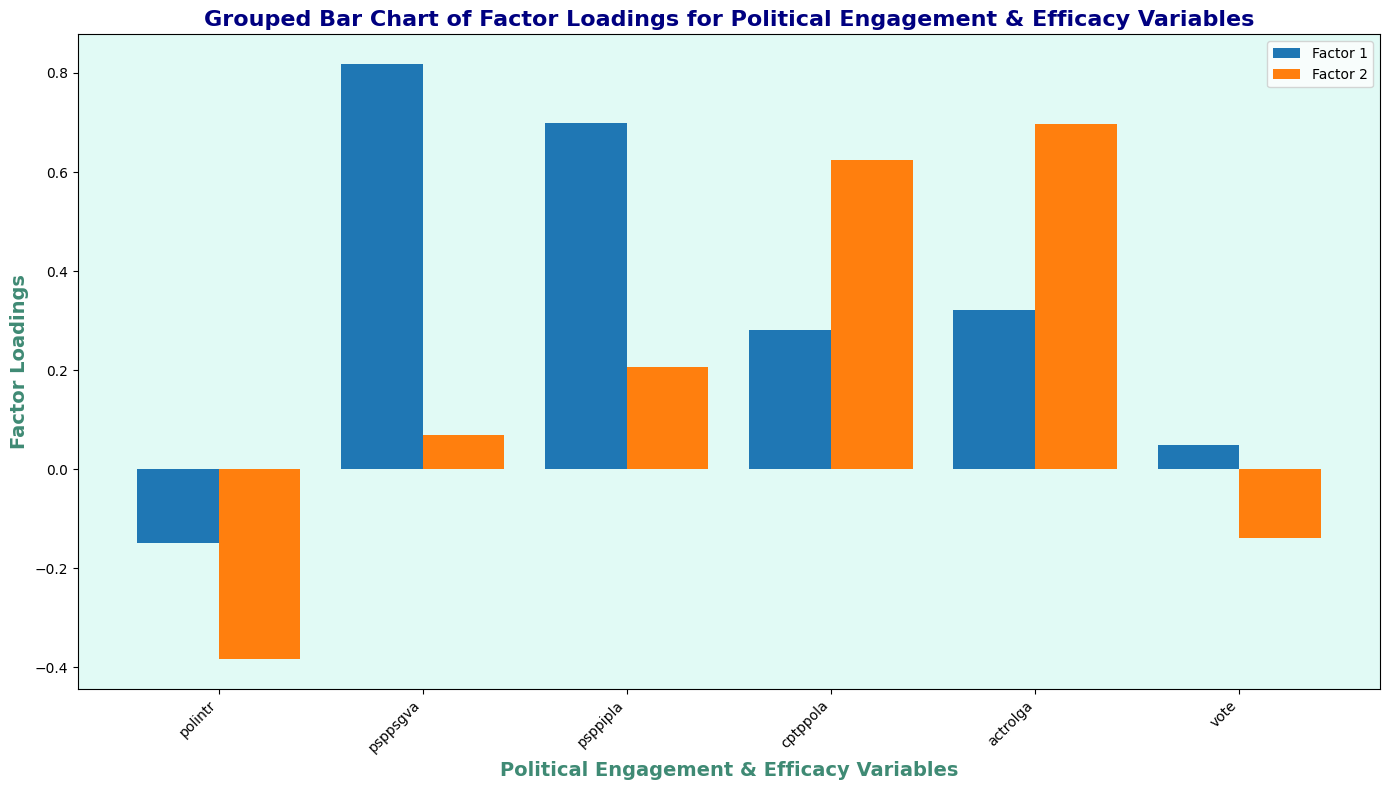


EFA completed for Political Engagement & Efficacy. Check saved PNG files for visualizations.

==================== Analyzing: Socio-Economic Satisfaction/Attitudes ====================

--- EFA Pre-Checks for Socio-Economic Satisfaction/Attitudes Variables ---
Bartlett's Test of Sphericity: Chi-square value = 22730.1574, p-value = 0.0000e+00
Kaiser-Meyer-Olkin (KMO) Statistic: 0.7018
Higher KMO values (close to 1) indicate suitability for factor analysis.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


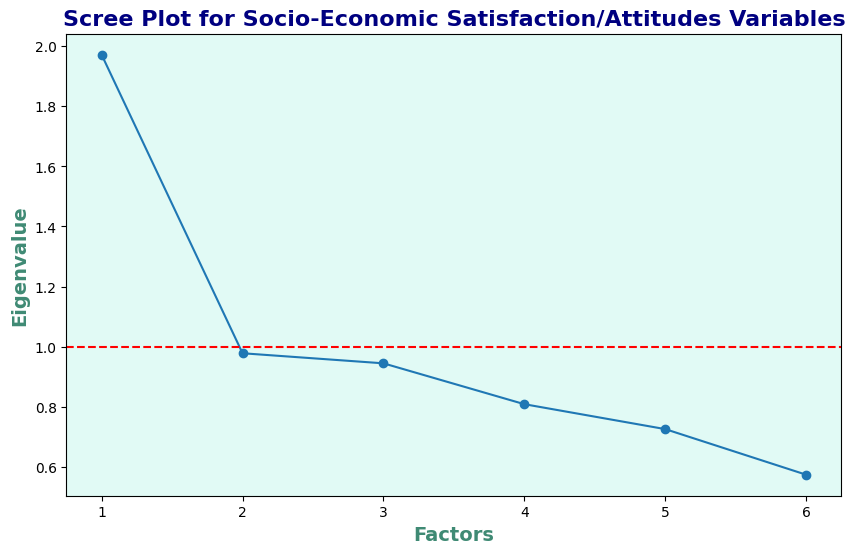


--- Factor Loadings for Socio-Economic Satisfaction/Attitudes Variables ---
         Factor 1  Factor 2
stflife  0.086608  0.188956
stfeco   0.354556  0.357894
stfgov   0.764376  0.180130
stfdem   0.470283  0.275189
stfedu   0.115250  0.371530
stfhlth  0.144225  0.430398


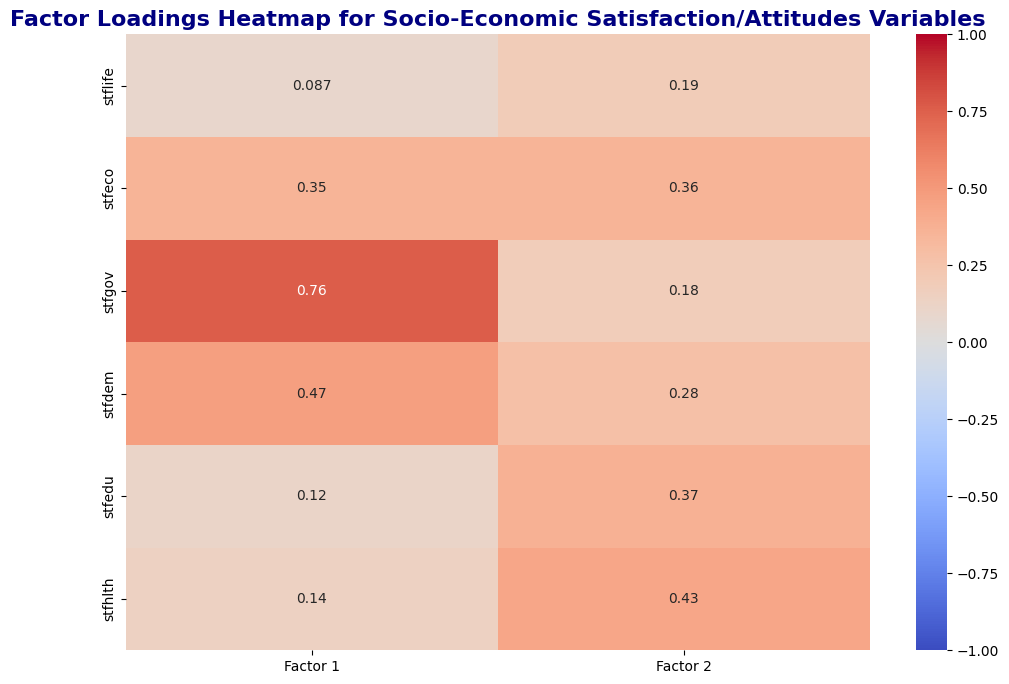

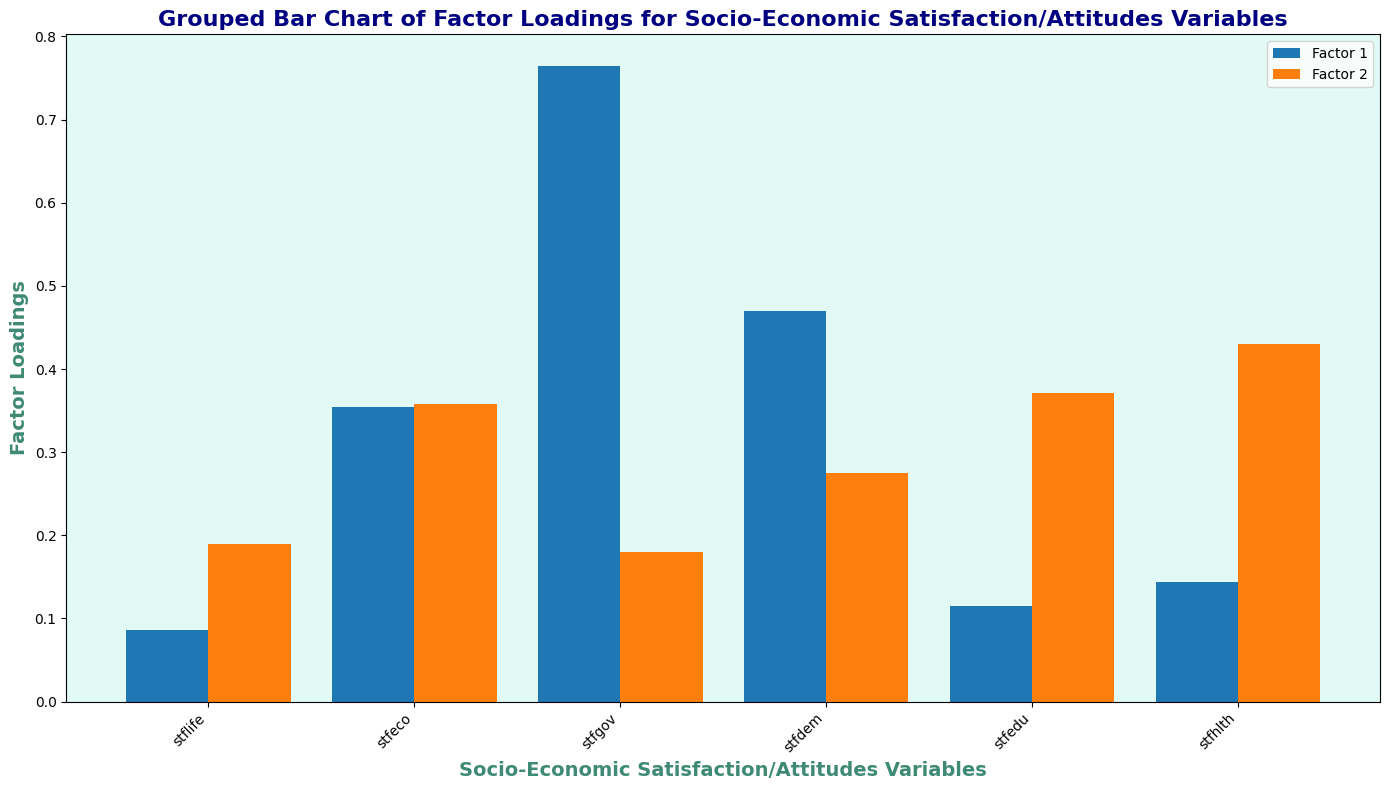


EFA completed for Socio-Economic Satisfaction/Attitudes. Check saved PNG files for visualizations.

==================== Analyzing: Immigration Attitudes ====================

--- EFA Pre-Checks for Immigration Attitudes Variables ---
Bartlett's Test of Sphericity: Chi-square value = 96381.8627, p-value = 0.0000e+00
Kaiser-Meyer-Olkin (KMO) Statistic: 0.7069
Higher KMO values (close to 1) indicate suitability for factor analysis.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


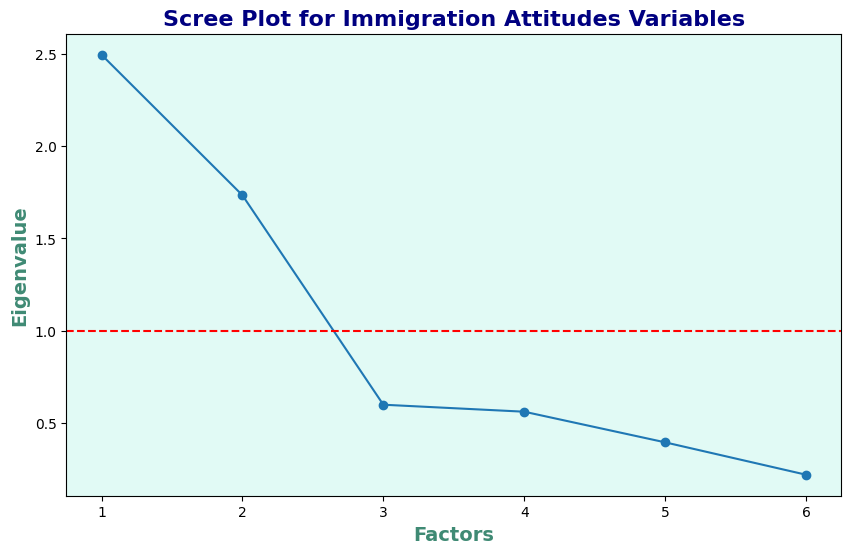


--- Factor Loadings for Immigration Attitudes Variables ---
         Factor 1  Factor 2
imsmetn  0.755248  0.039565
imdfetn  0.940181 -0.006916
impcntr  0.808101  0.006573
imbgeco  0.097206  0.624602
imueclt  0.093324  0.672936
imwbcnt  0.099678  0.628801


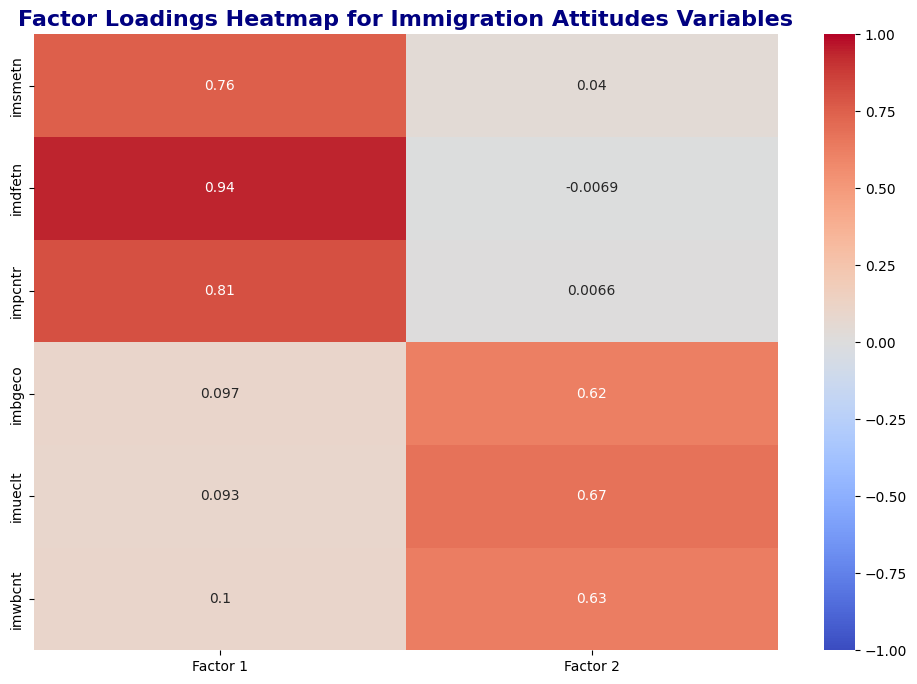

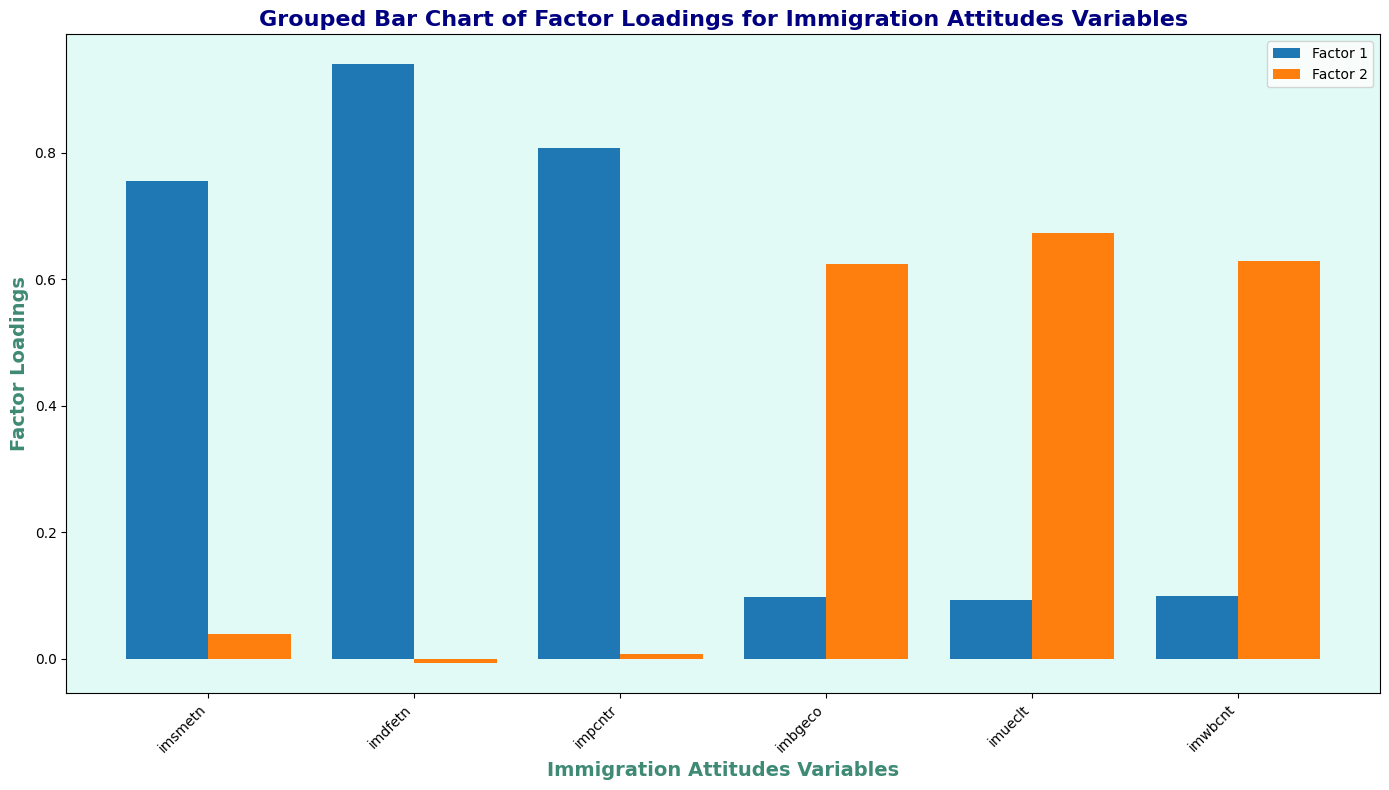


EFA completed for Immigration Attitudes. Check saved PNG files for visualizations.

==================== Analyzing: Climate Change Attitudes ====================

--- EFA Pre-Checks for Climate Change Attitudes Variables ---
Bartlett's Test of Sphericity: Chi-square value = 17810.3299, p-value = 0.0000e+00
Kaiser-Meyer-Olkin (KMO) Statistic: 0.5571
Higher KMO values (close to 1) indicate suitability for factor analysis.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


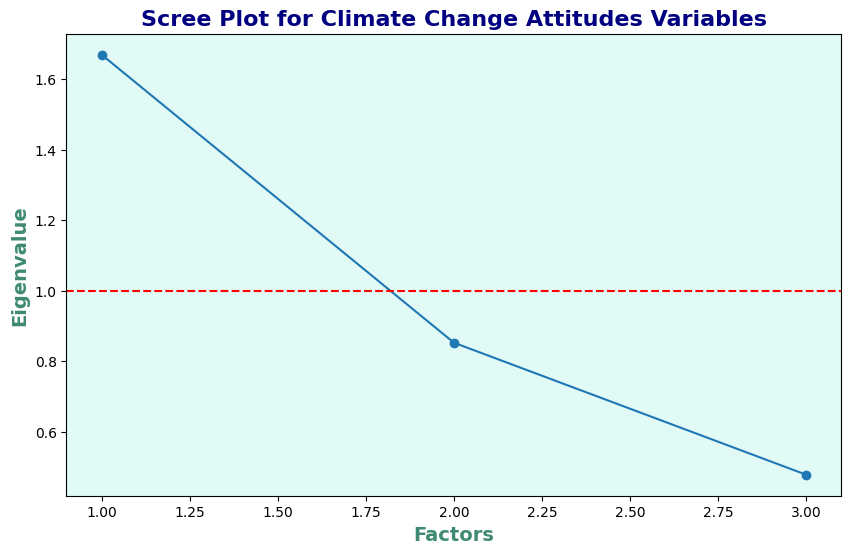


--- Factor Loadings for Climate Change Attitudes Variables ---
         Factor 1
ccnthum -0.525495
ccrdprs -0.950893
wrclmch -0.321612


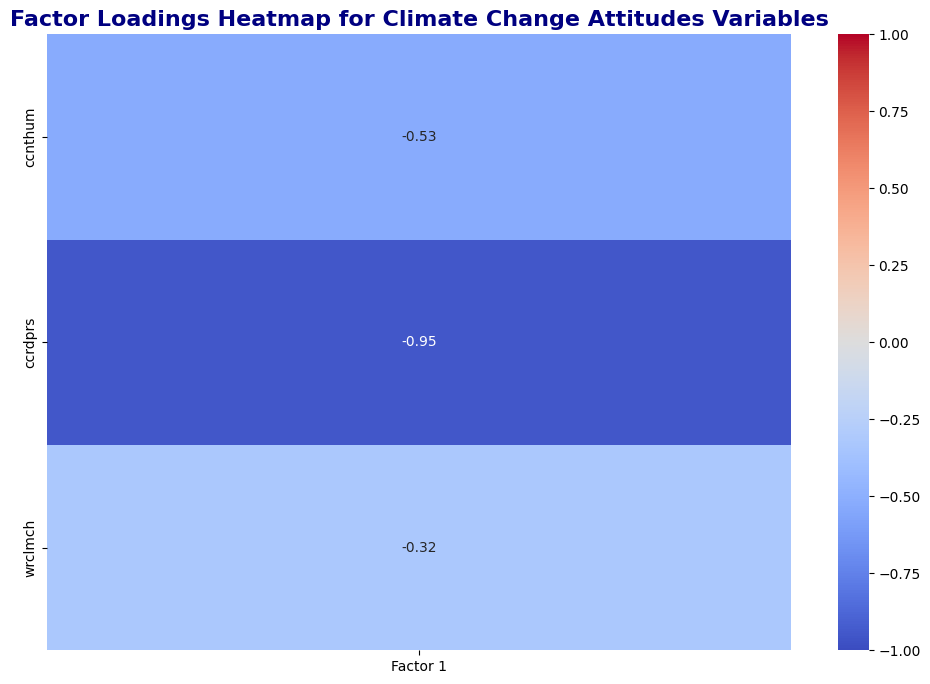

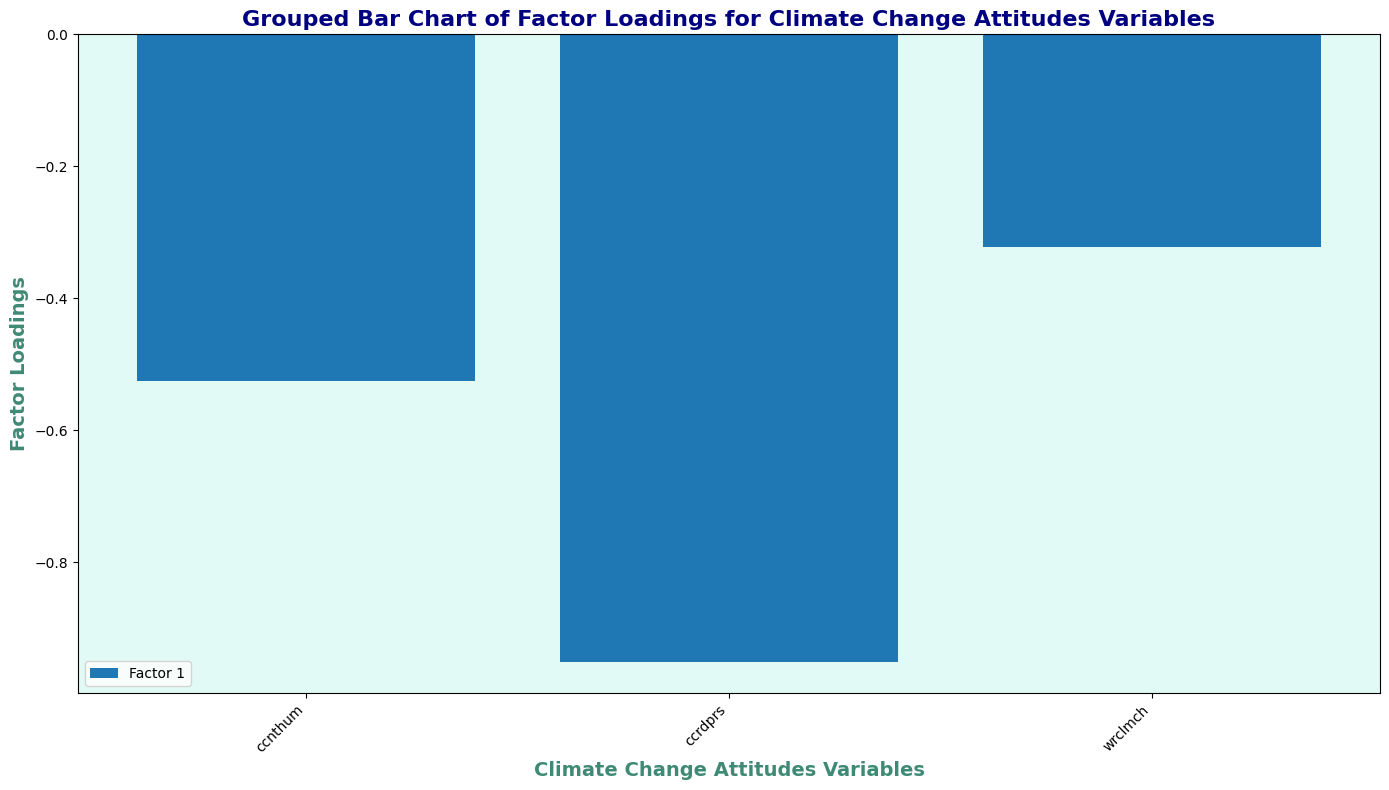


EFA completed for Climate Change Attitudes. Check saved PNG files for visualizations.


In [ ]:
# EFA for each group

run_efa(df_selected, trust_cols, "Trust and Social Attitudes", 3, "trust")
run_efa(df_selected, political_cols, "Political Engagement & Efficacy", 2, "political")
run_efa(df_selected, socioeco_cols, "Socio-Economic Satisfaction/Attitudes", 2, "socioeco")
run_efa(df_selected, immigration_cols, "Immigration Attitudes", 2, "immigration")
run_efa(df_selected, climate_cols, "Climate Change Attitudes", 1, "climate")

# Refer to **Part 2: EFA Trust and Social Attitudes Factors Analysis Plot** for continuation.